# Clasificación

Hoy realizaremos un Modelo de Aprendizaje Automático Supervisado de **Clasificación**. A diferencia de los vistos hasta ahora de **Regresión**, en los modelos de Clasificación la *variable a predecir* es **categórica**, es decir que buscamos predecir una clase. 

A lo largo de este Módulo veremos diferentes ejemplos de Clasifiaciones, en la clase de hoy utilizaremos un dataset de Flores *Iris* para predecir la *especie* de acuerdo a las características de sus pétalos y sepalos.

## KNN

KNN es un es un algoritmo de aprendizaje supervisado que que se basa en el concepto del refrán, “dime con quien andas y te diré quien eres”. 
Para hacer una predicción busca los valores de los datos similiares y en base a eso determina la predicción. 
KNN necesita que le indiquemos el valor del hiperparámetro K, es decir la cantidad de "vecinos" que tiene que revisar para realizar la predicción. Una vez que se recibe un dato, toma los k vecinos cercanos y realiza la Predicción:

KNN puede ser utilizado para un modelo de **Regresión** o de **Clasificación**: 
* En caso de ser un problema de clasificación, se escoge la categoría más popular entre los K vecinos seleccionados (*KNeighborsClassifier*). 
* En caso de ser un problema de regresión, se promedian los valores de la variable objetivo de los vecinos seleccionados.(*KNeighborsRegressor*)

#### Problema y Búsqueda de datos

El dateset que utilizaremso es de las flores *Iris* donde tenemos las características de las flores: 
- Largo del sépalo (*SepalLengthCm*)
- Ancho del sépalo (*SepalWidthCm*)
- Largo del pétalo (*PetalLengthCm*)
- Ancho del pétalo (*PetalWidthCm*)

En base a esas características es posible predecir la **Especie (Species)** de flor *Iris*. El dataset fue extraído de [Kaggle](https://www.kaggle.com/uciml/iris)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv("Iris.csv")

#### Exploración del dataset

In [3]:
# Vemos los primero 3 registros

data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
# Vemos si tiene datos nulos

data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Vemos el tipo de datos

data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
# Vemos la correlación de las variables numércias

data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


##### Variable target: Species

Vamos a ver la distribución de la variable a predecir que es *Species*, está variable es categórica por lo que utilizaremos *value_counts* para ver su distribución y realizaremos un gráfico de *countplot*


In [7]:
# Distribución de la variable target

data["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

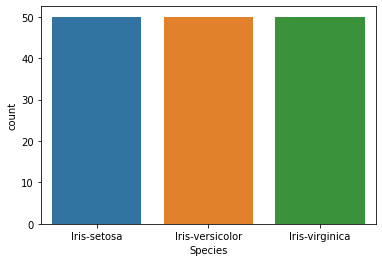

In [8]:
sns.countplot(data["Species"])

##### Visualización variables

Utilizaremos un tipo de Gráfico de *pairplot* que permite el entrecruzamiento de todas las variables entre sí (puede tardar un poco en ejecutarse)


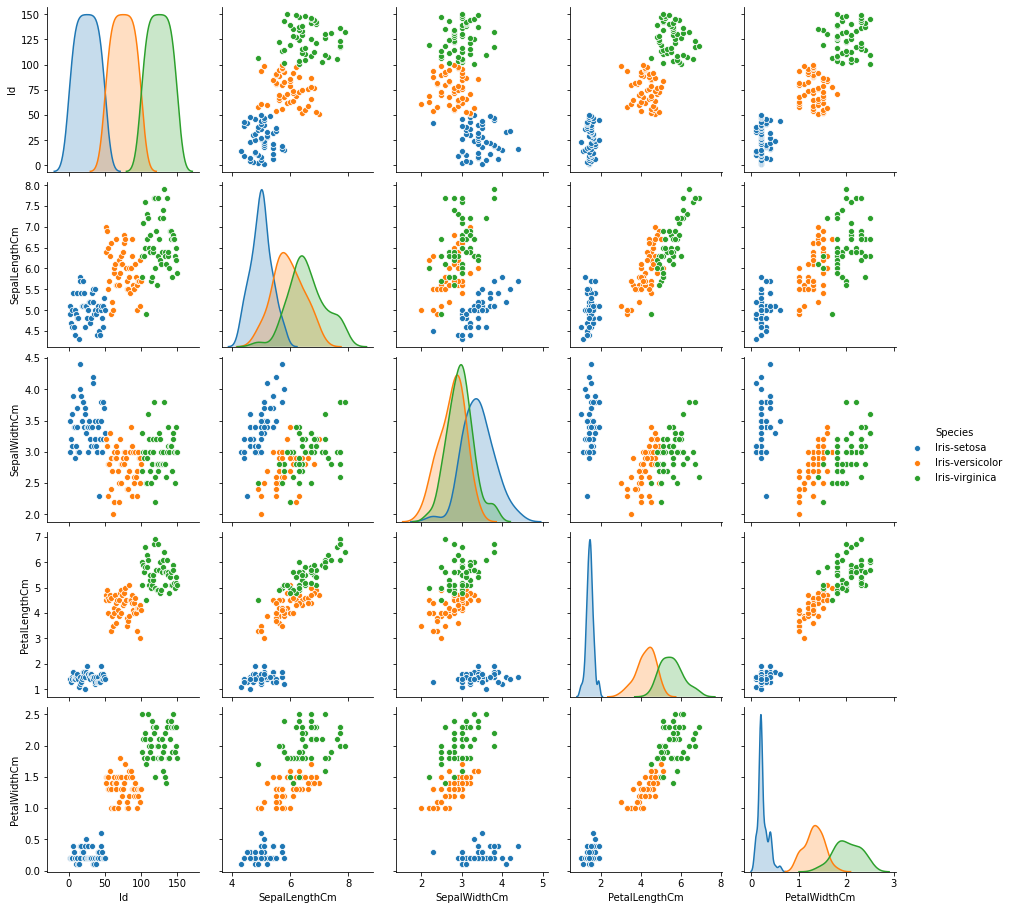

In [9]:
sns.pairplot(data, hue="Species")

#### Generación de modelo

Para poder realizar una visualización de lo que estamos realizando al entrenar y testear el modelo, en primer lugar lo realizaremos uitilizando solamente 2 variables de las 4 con las que contamos.

En este caso seleccionaremos el largo y ancho del pétalo y vamos a entrenar un modelo de [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).


In [10]:
# Generamos el DataFrame que utilizaremos unicamente con 2 variables más la variable a predecir

data_2variables = data[["PetalWidthCm", "PetalLengthCm", "Species"]]
data_2variables.head(3)

,PetalWidthCm,PetalLengthCm,Species
0,0.2,1.4,Iris-setosa
1,0.2,1.4,Iris-setosa
2,0.2,1.3,Iris-setosa


<AxesSubplot:xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

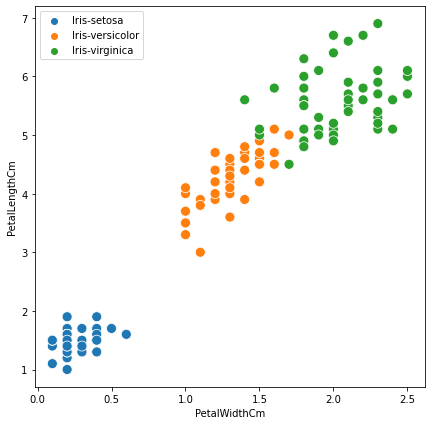

In [11]:
# Visualizamos los datos

plt.figure(figsize = (7,7))
sns.scatterplot(data = data_2variables, x = "PetalWidthCm", y = "PetalLengthCm",  hue=data_2variables["Species"].to_list(), s=100)

In [12]:
# Generamos X e y

X = data_2variables.drop(columns = "Species")   #variables predictora
y = data_2variables["Species"]   #variable a predecir

In [13]:
# Dividimos datos en train y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=158)  #por default 25% de test


In [14]:
print("El tamaño de X_train es: ", X_train.shape)
print("El tamaño de X_test es: ",X_test.shape)
print("El tamaño de y_train es: ",y_train.shape)
print("El tamaño de y_test es: ",y_test.shape)

El tamaño de X_train es:  (112, 2)
El tamaño de X_test es:  (38, 2)
El tamaño de y_train es:  (112,)
El tamaño de y_test es:  (38,)


In [15]:
# Importamos el modelo que utilizaremos. KNN: 

from sklearn.neighbors import KNeighborsClassifier

##### Instanciar el modelo y definir hiperparámetros

En este momento tenemos que instanciar el modelo que utilizaremos y definir sus hiperparámetros. Se puede observar las opciones en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).
Lo que definiremos en este caso es la cantidad de "vecinos" que el modelo utilizará para realizar las predicciones, en este caso k=3

In [16]:
# Instanciamos el modelo que utilizaremos KKN con el hiperárametro de cantidad de vecinos, en este caso 3

modelo_2variables_k3 = KNeighborsClassifier(n_neighbors = 3)

In [17]:
modelo_2variables_k3

KNeighborsClassifier(n_neighbors=3)

In [18]:
# Entrenamos el modelo

modelo_2variables_k3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

##### Probamos nuestro modelo

Utilizamos el metodo *predict* para probar nuestro modelo con los datos de test.

En este caso realizaremos una matriz de confusión que sirve para comparar los datos obtenidos con los datos reales (que guardamos previamente). La métrica que utilizaremos es *exactitud (accuracy)* que veremos en profundidad la clase que viene.

In [19]:
# Probamos nuestro modelo con los datos de test

y_pred_2variables_k3 = modelo_2variables_k3.predict(X_test)
y_pred_2variables_k3

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [20]:
# Comparamos y_test(datos reales) con y_pred_knn3 (datos predichos) para ver si el modelo hizo las predicciones correctas

# Matriz de confusión: comparando resultado original (y_test) con predicción del modelo (y_pred_knn5)

from sklearn.metrics import confusion_matrix

matriz_2variables_k3 = confusion_matrix(y_test, y_pred_2variables_k3)
matriz_2variables_k3

array([[ 8,  0,  0],
       [ 0, 13,  1],
       [ 0,  2, 14]], dtype=int64)

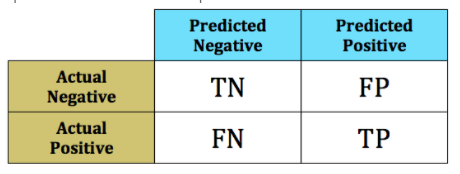

Text(33.0, 0.5, 'Etiquetas reales')

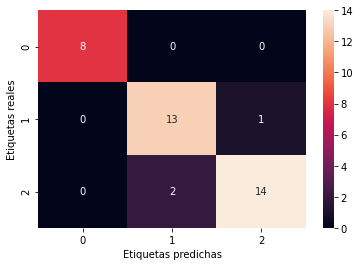

In [21]:
# Vemos la matriz de confusión en una visualización heatmap

sns.heatmap(matriz_2variables_k3, annot=True)
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")

##### Métrica Accuracy (exactitud)

In [22]:
from sklearn.metrics import accuracy_score

exactitud_2variables_k3 = accuracy_score(y_test, y_pred_2variables_k3)
exactitud_2variables_k3

0.9210526315789473

##### Gráficamos los resultados y comparamos con reales

Para poder comparar visualmente la predicción realizada con la de los datos de test, vamos a generar un dataset con los registros de test. Vamos a tener 4 columnas: las variables predi toras, las especies reales y las especies predichas, de esta manera podremos realizar un gráfico.

In [23]:
df_grafico = pd.concat([X_test["PetalWidthCm"], X_test["PetalLengthCm"]], axis=1)
df_grafico["Species_reales"] = y_test
df_grafico["Species_predichas"] = y_pred_2variables_k3
df_grafico.head()

,PetalWidthCm,PetalLengthCm,Species_reales,Species_predichas
8,0.2,1.4,Iris-setosa,Iris-setosa
109,2.5,6.1,Iris-virginica,Iris-virginica
123,1.8,4.9,Iris-virginica,Iris-virginica
97,1.3,4.3,Iris-versicolor,Iris-versicolor
34,0.1,1.5,Iris-setosa,Iris-setosa


<AxesSubplot:xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

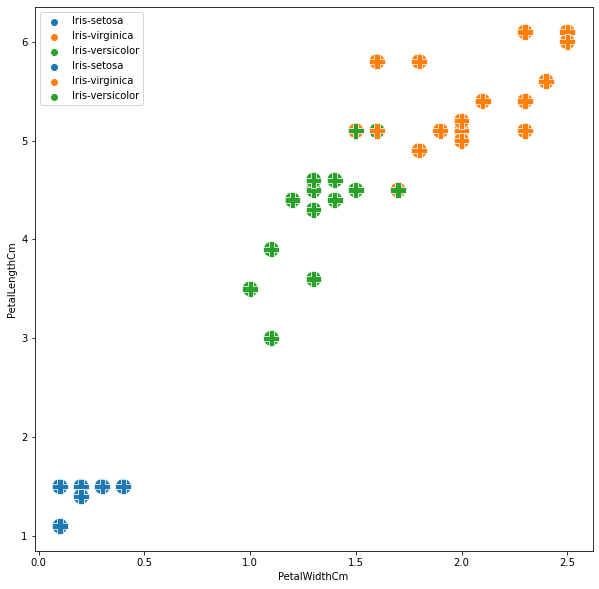

In [24]:
# Visualizamos para comparar

plt.figure(figsize = (10,10))
sns.scatterplot(data = df_grafico, x = "PetalWidthCm", y = "PetalLengthCm",  hue=df_grafico["Species_reales"].to_list(), s=250)
sns.scatterplot(data = df_grafico, x = "PetalWidthCm", y = "PetalLengthCm",  hue=df_grafico["Species_predichas"].to_list(), s=250, marker="P")


### Hiperparámetro distinto

Ahora vamos a realizar el entrenamiento y testeo del modelo siguiendo utilizando solo 2 variables pero en este caso vamos a cambiar la cantiddad de "vecinos" con los que realizar la comparación: k=5

In [25]:
#Instanciamos el modelo que utilizaremos: KNN con hiperparámetro k = 5 (5 vecinos más cercanos)

modelo_2variables_k5 = KNeighborsClassifier(n_neighbors = 5)

In [26]:
modelo_2variables_k5

KNeighborsClassifier()

In [27]:
#Entrenamos el modelo

modelo_2variables_k5.fit(X_train, y_train)

KNeighborsClassifier()

##### Probamos nuestro modelo

Utilizamos el metodo predict para probar nuestro modelo con los datos de test

In [28]:
# Probamos nuestro modelo con los datos de test

y_pred_2variables_k5 = modelo_2variables_k5.predict(X_test)
y_pred_2variables_k5

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [29]:
# Matriz de confusión: comparando resultado original (y_test) con predicción del modelo (y_pred_knn5)

matriz_2variables_k5 = confusion_matrix(y_test, y_pred_2variables_k5)
matriz_2variables_k5

array([[ 8,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 14]], dtype=int64)

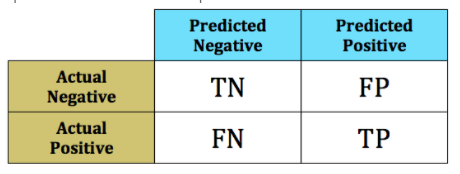

Text(33.0, 0.5, 'Etiquetas reales')

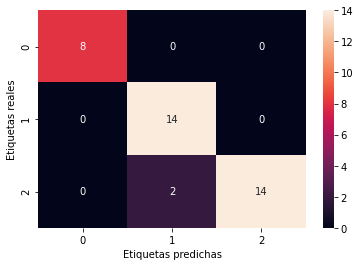

In [30]:
sns.heatmap(matriz_2variables_k5, annot=True)
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")

##### Métrica Accuracy (exactitud)

In [31]:
exactitud_2variables_k5 = accuracy_score(y_test, y_pred_2variables_k5)
exactitud_2variables_k5

0.9473684210526315

In [32]:
print("La exactitud del modelo con 2 variables y k = 3 es", exactitud_2variables_k3)
print("La exactitud del modelo con 2 variables y k = 5 es", exactitud_2variables_k5)

La exactitud del modelo con 2 variables y k = 3 es 0.9210526315789473
La exactitud del modelo con 2 variables y k = 5 es 0.9473684210526315


##### Gráficamos los resultados y comparamos con reales

Nuevamente para poder comparar visualmente la predicción realizada con la de los datos de test, vamos a generar un dataset con los registros de test con 4 columnas: las variables preditoras, las especies reales y las especies predichas, de esta manera podremos realizar un gráfico.

In [33]:
df_grafico_hiper5 = pd.concat([X_test["PetalWidthCm"], X_test["PetalLengthCm"]], axis=1)
df_grafico_hiper5["Species_reales"] = y_test
df_grafico_hiper5["Species_predichas"] = y_pred_2variables_k5
df_grafico_hiper5.head()

,PetalWidthCm,PetalLengthCm,Species_reales,Species_predichas
8,0.2,1.4,Iris-setosa,Iris-setosa
109,2.5,6.1,Iris-virginica,Iris-virginica
123,1.8,4.9,Iris-virginica,Iris-virginica
97,1.3,4.3,Iris-versicolor,Iris-versicolor
34,0.1,1.5,Iris-setosa,Iris-setosa


<AxesSubplot:xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

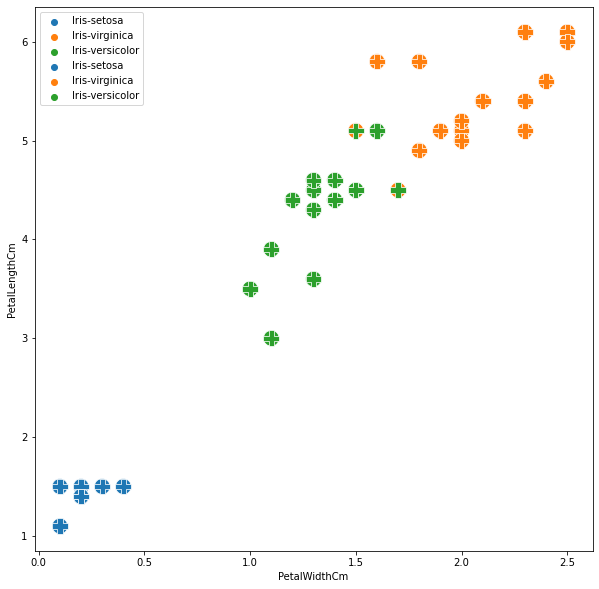

In [34]:
# Visualizamos para comparar

plt.figure(figsize = (10,10))
sns.scatterplot(data = df_grafico_hiper5, x = "PetalWidthCm", y = "PetalLengthCm",  hue=df_grafico_hiper5["Species_reales"].to_list(), s=250)
sns.scatterplot(data = df_grafico_hiper5, x = "PetalWidthCm", y = "PetalLengthCm",  hue=df_grafico_hiper5["Species_predichas"].to_list(), s=250, marker="P")


### Modelo utilizando todas las variables

Ahora vamos a entrenar un 3er modelo pero utilizando las 4 variables del Dataset. En este caso no podremos realizar la visualización pero si veremos la performance a través de la métrica accuracy.

In [35]:
# Generamos X e y en base al dataset completo orginial: data

X = data.drop(columns = "Species")   #variables predictora
y = data["Species"]   #variable a predecir

In [36]:
# Dividimos datos en train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=180)  #por default 25% de test

In [37]:
print("El tamaño de X_train es: ", X_train.shape)
print("El tamaño de X_test es: ",X_test.shape)
print("El tamaño de y_train es: ",y_train.shape)
print("El tamaño de y_test es: ",y_test.shape)

El tamaño de X_train es:  (112, 5)
El tamaño de X_test es:  (38, 5)
El tamaño de y_train es:  (112,)
El tamaño de y_test es:  (38,)


In [38]:
#Instanciamos el modelo que utilizaremos: KNN y el hiperparámetro k=3 (cantidad de vecinos)

modelo_data_k3 = KNeighborsClassifier(n_neighbors = 3)

In [39]:
modelo_data_k3

KNeighborsClassifier(n_neighbors=3)

In [40]:
#Entrenamos el modelo

modelo_data_k3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

##### Probamos nuestro modelo

Utilizamos el metodo predict para probar nuestro modelo con los datos de test

In [41]:
# Probamos nuestro modelo con los datos de test

y_pred_data_k3 = modelo_data_k3.predict(X_test)
y_pred_data_k3

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa'],
      dtype=object)

In [42]:
# Matriz de confusión:comparando resultado original (y_test) con predicción del modelo (y_pred_knn5)

matriz_data_k3 = confusion_matrix(y_test, y_pred_data_k3)

matriz_data_k3

array([[12,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 15]], dtype=int64)

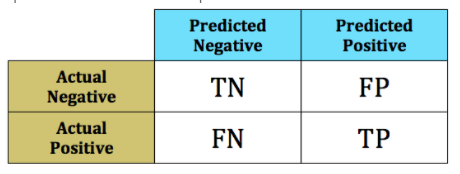

Text(33.0, 0.5, 'Etiquetas reales')

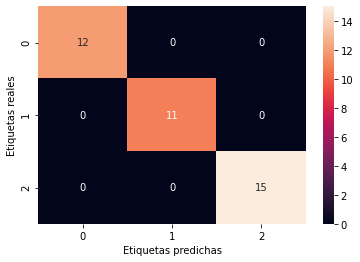

In [43]:
sns.heatmap(matriz_data_k3, annot=True)
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")

##### Métrica Accuracy (exactitud)

In [44]:
exactitud_data_k3 = accuracy_score(y_test, y_pred_data_k3)
exactitud_data_k3

1.0

In [45]:
print("La exactitud del modelo con 2 variables y k = 3 es", round(exactitud_2variables_k3,2))
print("La exactitud del modelo con 2 variables y k = 5 es", round(exactitud_2variables_k5,2))
print("La exactitud del modelo con todas las variables y k = 3 es", exactitud_data_k3)


La exactitud del modelo con 2 variables y k = 3 es 0.92
La exactitud del modelo con 2 variables y k = 5 es 0.95
La exactitud del modelo con todas las variables y k = 3 es 1.0
